## **Importing Packages**

Make sure to install the packages before importing if needed.

In [1]:
import scanpy as sc
import anndata as ad
import numpy as np

## **Load Data**

https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md 
requirements for all AnnData objects CELLxCELL

In [2]:
## Emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/21000_AD_PD_CTRL.h5ad")

## Path Yara 
# adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/21000_AD_PD_CTRL.h5ad/21000_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [31]:
adata

AnnData object with n_obs × n_vars = 21000 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [32]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

adata.X[:5, :5]

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 5)>

In [33]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (21000, 34176).
There are 21000 cells and 34176 genes in this dataset.


In [34]:
print("The keys of adata.obs are the following:",adata.obs.keys())
adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


,Source,n_genes,n_counts,class,subclass,subtype,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,cell_type_ontology_term_id,...,genetic_ancestry,disease_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
barcodekey,,,,,,,,,,,,,,,,,,,,,
Donor_198-1-CATACCCAGTAGTCTC-0,R,1706,2920.0,Astro,Astro,Astro_WIF1,UBERON:0009834,tissue,EFO:0009922,CL:0000127,...,African,MONDO:0001627 || MONDO:0004975,astrocyte,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,69-year-old stage,14ZuPkE2qP
Donor_31-1-TATCTGTTCTTAGCTT-0,R,2375,4183.0,Immune,Micro,Micro,UBERON:0009834,tissue,EFO:0009922,CL:0000129,...,East Asian,MONDO:0001627 || MONDO:0004975,microglial cell,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,82-year-old stage,v^2Pa-t{ki
Donor_124-1-AAGTGAAGTCAGCTTA-0,R,7384,29642.0,EN,EN_L3_5_IT_3,EN_L3_5_IT_3,UBERON:0009834,tissue,EFO:0009922,CL:4023040,...,African,MONDO:0001627 || MONDO:0004975,L2/3-6 intratelencephalic projecting glutamate...,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,|5T5TBZ4qb
Donor_730-2-CCACACTTCACTTCTA-1,R,4354,9341.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,unknown,MONDO:0001627 || MONDO:0004975,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,vg$LwHWUs#
Donor_310-2-TACGGTAGTGACTCGC-1,R,2202,3998.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,unknown,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,ItR^+MR?zy


In [35]:
print("name of all donors : \n",adata.obs_names)
print("name of all genes : \n",adata.var_names)

name of all donors : 
 Index(['Donor_198-1-CATACCCAGTAGTCTC-0', 'Donor_31-1-TATCTGTTCTTAGCTT-0',
       'Donor_124-1-AAGTGAAGTCAGCTTA-0', 'Donor_730-2-CCACACTTCACTTCTA-1',
       'Donor_310-2-TACGGTAGTGACTCGC-1', 'Donor_1347-2-GTACAGTCAGACAATA-1',
       'Donor_1347-1-CAAGCTATCTAGCATG-0', 'Donor_604-2-CTAAGTGCATAGGAGC-1',
       'Donor_604-1-TATCGCCCAATCTCGA-0', 'Donor_1040-1-ATAGAGAGTCTCTCAC-0',
       ...
       'Donor_1003-1-ATTACCTCATCGCTCT-1', 'Donor_745-2-CACGAATAGCCATGCC-1',
       'Donor_1214-1-AGAAATGGTGTATACC-0', 'Donor_634-2-CTAACTTGTGGTGATG-0',
       'Donor_135-2-TGACGCGTCTTGGATG-0', 'Donor_745-2-GTCTTTACAATACCTG-1',
       'Donor_135-2-ATTCCATCAAAGGCTG-0', 'Donor_1254-2-TTCACCGGTCAGTCTA-0',
       'Donor_1214-2-TCAATCTTCACTTCTA-1', 'Donor_794-1-AGAGAATCAAGAAACT-0'],
      dtype='object', name='barcodekey', length=21000)
name of all genes : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
    

In [36]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [37]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"]==disease_type]), " cells :", disease_type)

7000  cells : dementia || Alzheimer disease
7000  cells : dementia || Parkinson disease
7000  cells : normal


In [38]:
# métadonnées gènes 
print("adata.var.keys :", adata.var.keys())

adata.var.head(2)

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


,gene_name,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000000003,TSPAN6,256237,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,TNMD,21369,False,TNMD,NCBITaxon:9606,gene,873,protein_coding


##### **UMAP : just to compare with our results**

In [39]:
# embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# informations diverses
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


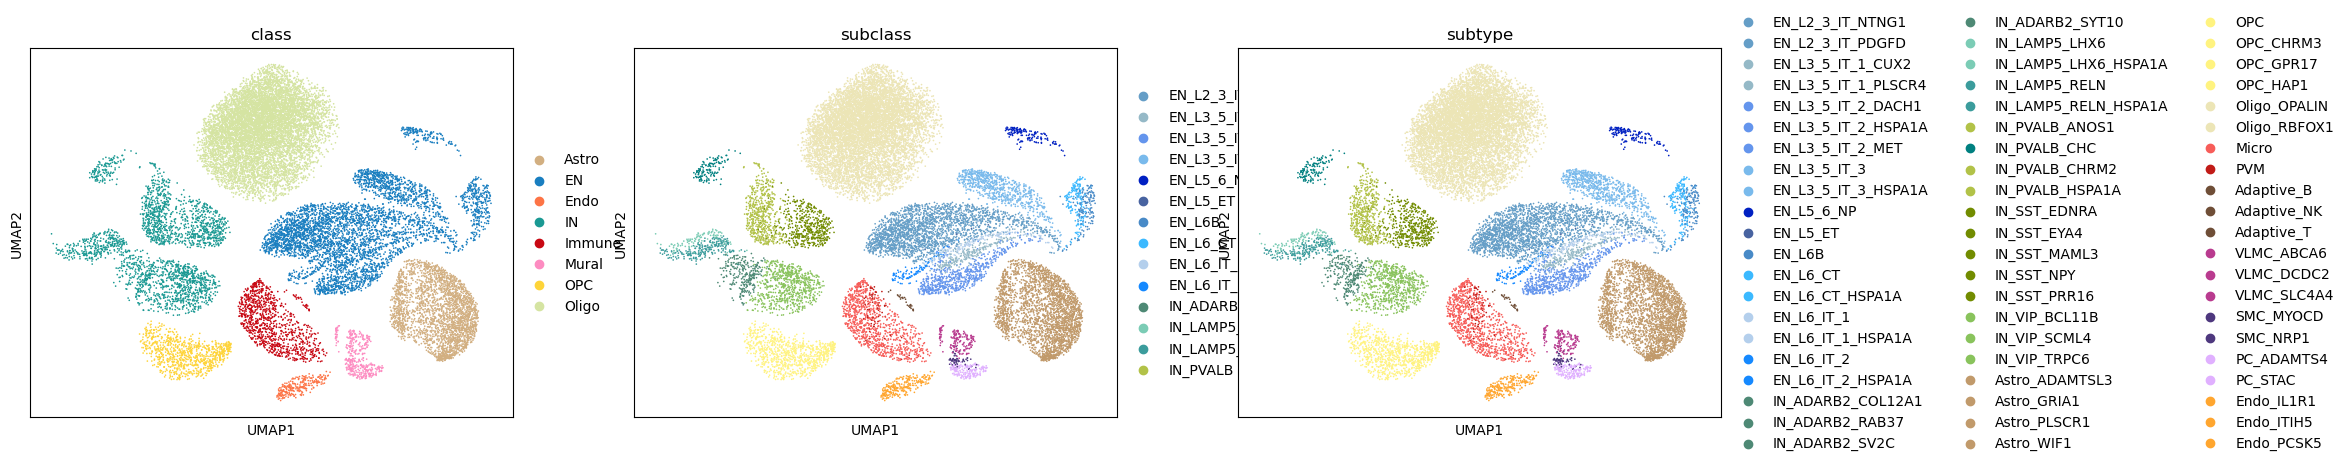

In [40]:
# sc.pl.umap(adata, color='cell_type')
# sc.pl.umap(adata, color='disease')
# sc.pl.umap(adata, color='AD_status')
# sc.pl.umap(adata, color='sex')
# sc.pl.umap(adata, color='subclass')
# sc.pl.umap(adata, color=['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

## **RNAseq pipeline**

### 1. Quality Check

Before filtering of low quality cells: Visualization of QC metrics

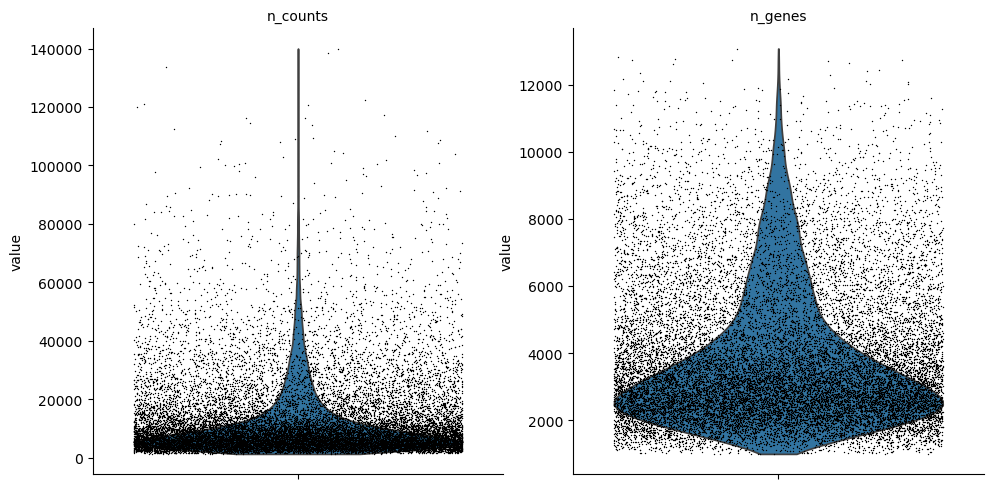

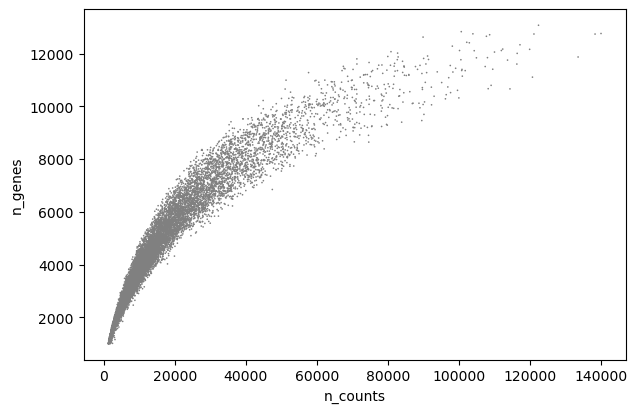

In [3]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)
sc.pl.scatter(adata, x='n_counts', y='n_genes') # Scatter plot of number of genes vs number of counts

Filtering of low quality cells

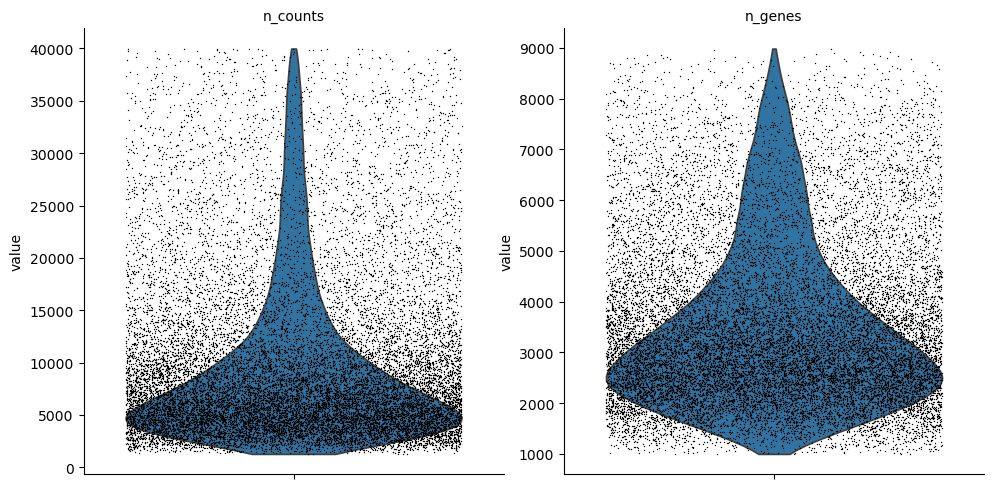

In [4]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 9000, :] # cutoff chosen: 9 000 genes

adata = adata[adata.obs['n_counts'] < 40000, :] # cutoff chosen: 40 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)



Filtering mitochondrial genes

In [5]:
# Counts the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculate QC metrics including the percentage of mitochondrial genes and add them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p=True
)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_79992/38306311.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


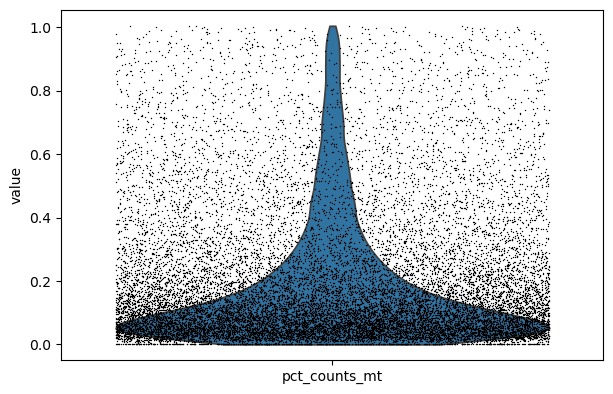

In [6]:
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter=0.4,
    rotation=0,   
    stripplot=True,
    show=True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
adata = adata[adata.obs['pct_counts_mt'] < 10, :]


????? Excluding ribosomic and hemoglobine genes
-> j'ai vu sur le site de scanpy que on exclu aussi les ribo et les hemo. Jsp si on le fait ici, mais y'a 517 gènes ribosomiques et 9 gènes hémoglobines. 

In [110]:
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("number of ribo genes : ",adata.var["ribo"].sum())

adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("number of hemo genes : ",adata.var["hb"].sum())

# sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_78546/127897315.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))


number of ribo genes :  517
number of hemo genes :  9


doublets recognition ?  
y'a pas de fonction comme dans seurat en python 
et en vrai vu qu'on a déjà choisi les cutoff plus tot, je pense que cette étape sert à rien 

je laisse le code, mais ca sert à rien je pense, et il marche pas et c'est super long pour le faire tourner

In [111]:
# import scrublet as scr
# import numpy as np

# # 1) Scrublet
# counts_matrix = adata.X.copy()
# scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

# doublet_scores, predicted_doublets = scrub.scrub_doublets()

# # 2) Ajouter au AnnData
# adata.obs['doublet_score'] = doublet_scores
# adata.obs['doublet_pred'] = predicted_doublets

# # 3) Visualiser distribution
# sc.pl.violin(adata, 'doublet_score', jitter=0.4)

# # 4) Pourcentage doublets
# adata.obs['doublet_pred'].value_counts(normalize=True)

### 2. Normalization

this part was already performed, so we are not doing it again

### 3. Highly Variable Genes

je crois qu'on ne peut pas faire un HVG parce que les données sont normalisées, et donc on peut pas faire cette technique. J'ai essayé mille trucs, mais en fait c'est pas recommandé de faire un HVG

we kept 3000 highly variable genes out of 34176 genes


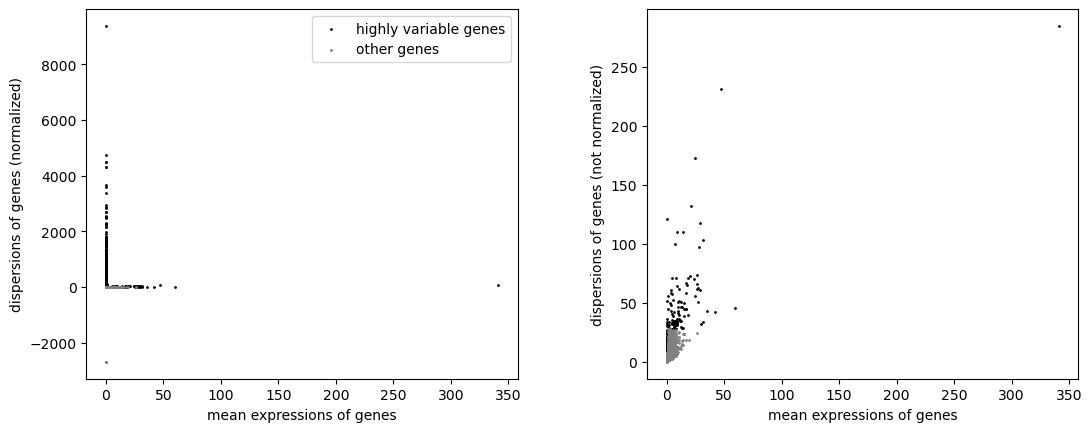

In [ ]:
# donc ca c'est faux !! 


nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

### 4. Scaling + PCA

/opt/anaconda3/envs/scanpy310/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


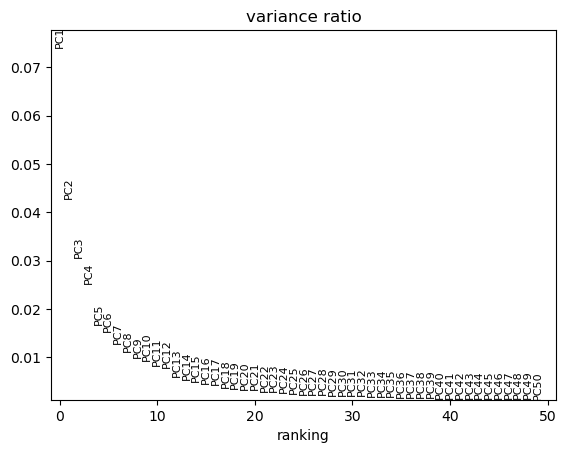

In [34]:
# scaling 
sc.pp.scale(adata, max_value=10)

# PCA
sc.pp.pca(adata)

sc.pl.pca_variance_ratio(adata, n_pcs=50) # elbow plot to see how many PCs to keep

### 5. Clustering

neighbors

In [35]:
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 40
sc.pp.neighbors(adata, n_pcs=nPC)

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


clustering

In [36]:
sc.tl.leiden(adata, resolution=0.01)
print("number of clusters :", len(adata.obs['leiden'].cat.categories))

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_79992/2112890458.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.01)


number of clusters : 8


UMAP

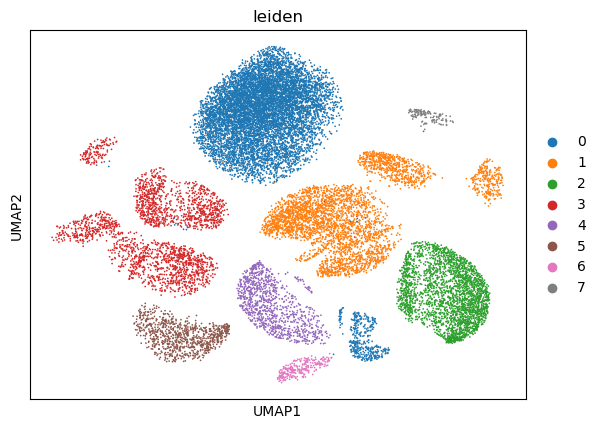

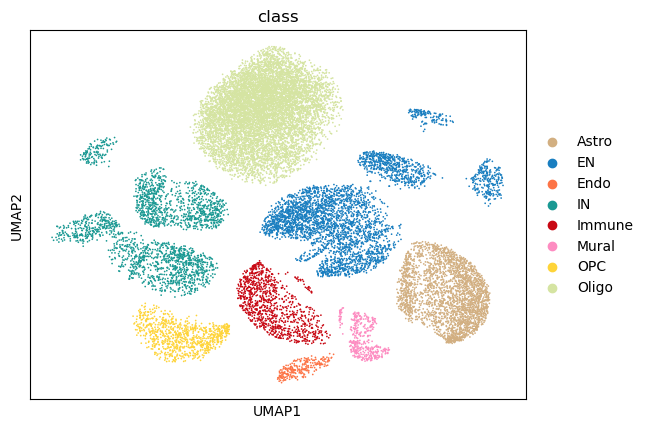

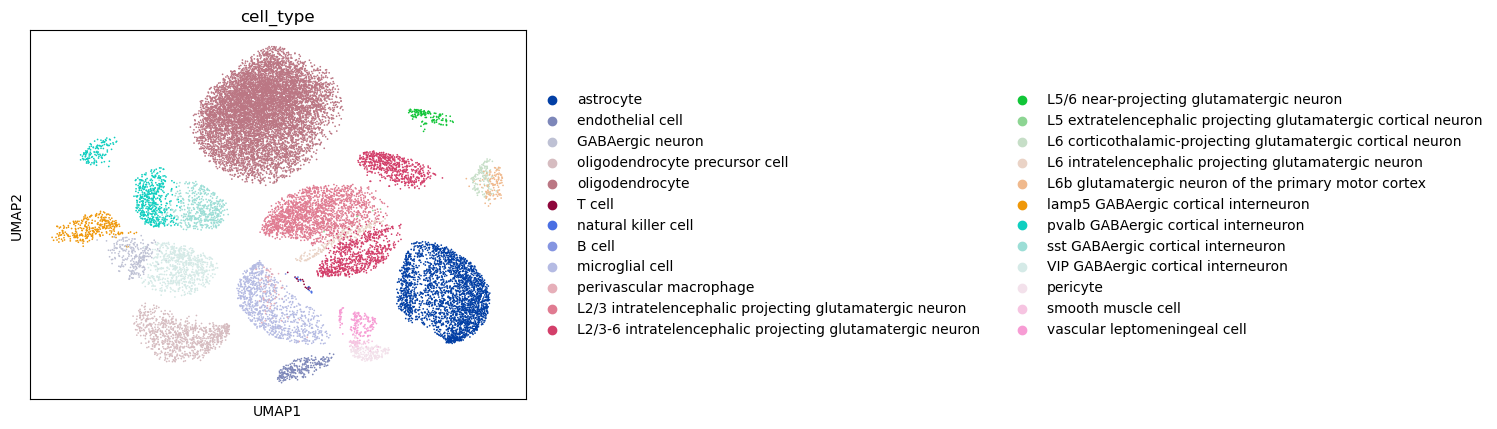

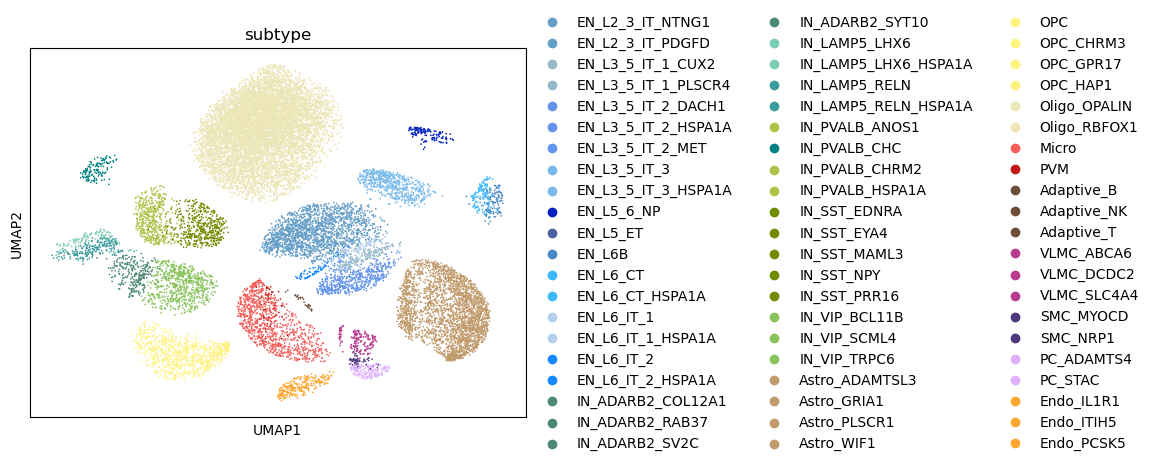

In [37]:
# UMAP
sc.pl.umap(adata, color="leiden")
sc.pl.umap(adata, color="class")
sc.pl.umap(adata, color='cell_type')
sc.pl.umap(adata, color='subtype')

chatgpt gave me this : but it's whatever, it was just to see if the previous stuff worked

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:669: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


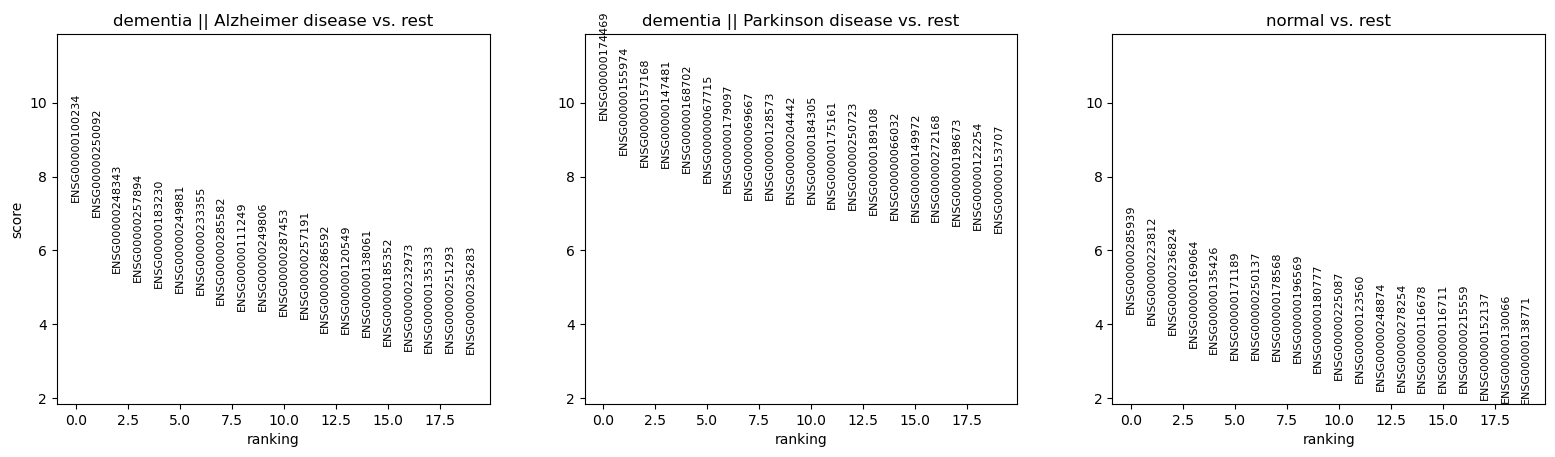

In [40]:
subset = adata[adata.obs['class'] == 'EN']

sc.tl.rank_genes_groups(subset, groupby="disease", method="wilcoxon")
sc.pl.rank_genes_groups(subset)


In [38]:
sc.tl.rank_genes_groups(adata, groupby="disease", method="wilcoxon")

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
